In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

(100, 100, 2)


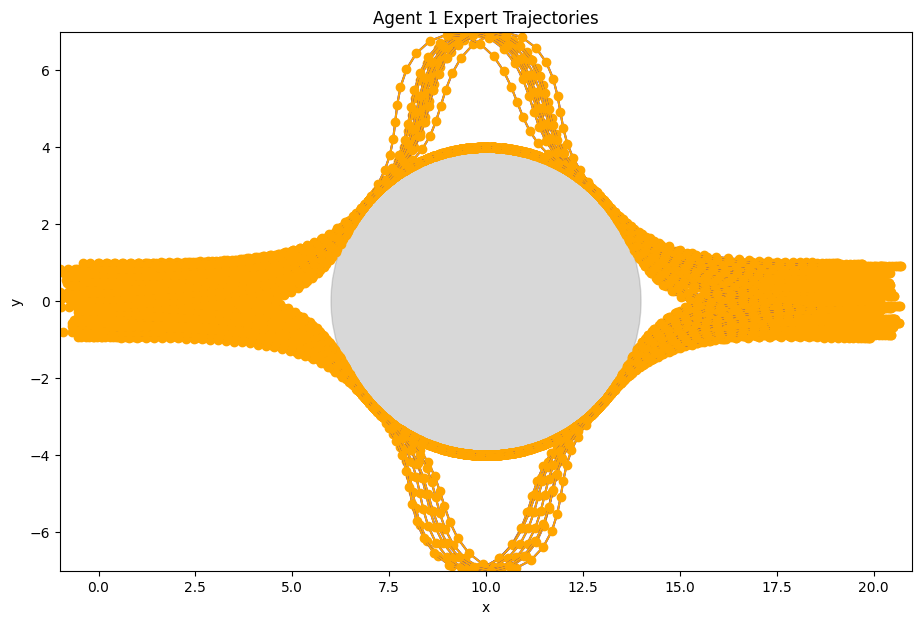

In [16]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Agent 1 Expert Trajectories")

expert_data1 = np.load('data/expert_data1_100_traj.npy')
print(np.shape(expert_data1))

for traj in expert_data1:
    plt.plot(traj[:, 0], traj[:, 1], 'b.-')
    plt.plot(traj[:, 0], traj[:, 1], 'o-', color='orange')

plt.show()

(100, 100, 2)


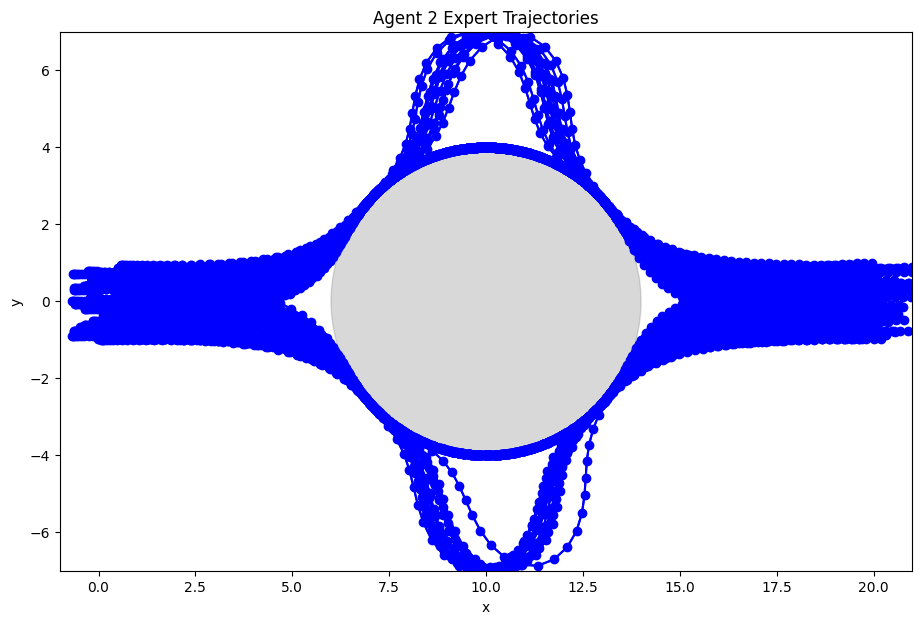

In [15]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Agent 2 Expert Trajectories")

expert_data2 = np.load('data/expert_data2_100_traj.npy')
print(np.shape(expert_data2))

for traj in expert_data2:
    plt.plot(traj[:, 0], traj[:, 1], 'b.-')
    plt.plot(traj[:, 0], traj[:, 1], 'o-', color='blue')

plt.show()

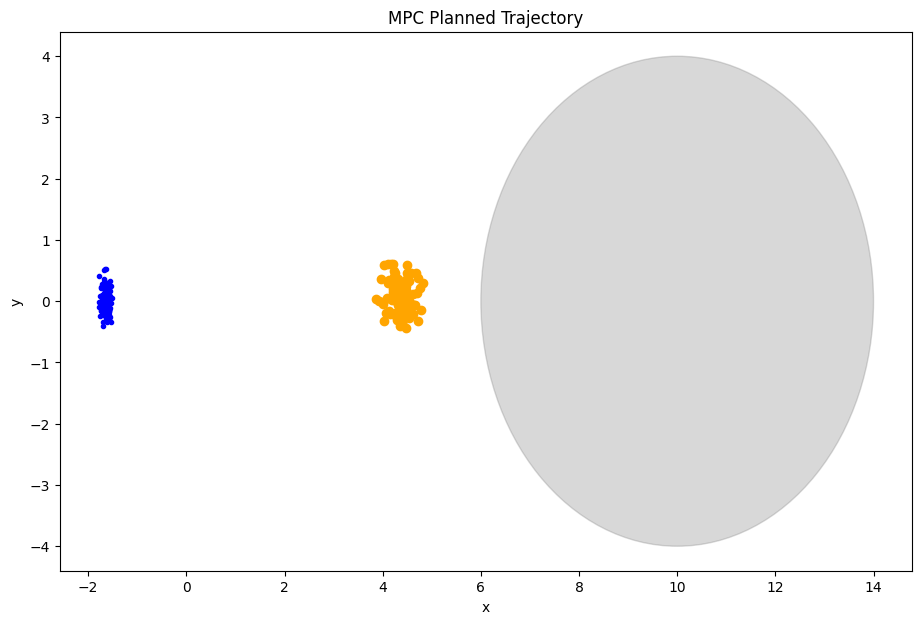

In [21]:
plt.figure(figsize=(11, 7))
# plt.ylim(-7, 7)
# plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

for i in range(100):
    traj1 = np.load(f'sampled_trajs/bc/traj1_{i:03d}.npy')
    plt.plot(traj1[0, 0], traj1[0, 1], 'b.-')
    plt.plot(traj1[-1, 0], traj1[-1, 1], 'o-', color='orange')

plt.show()

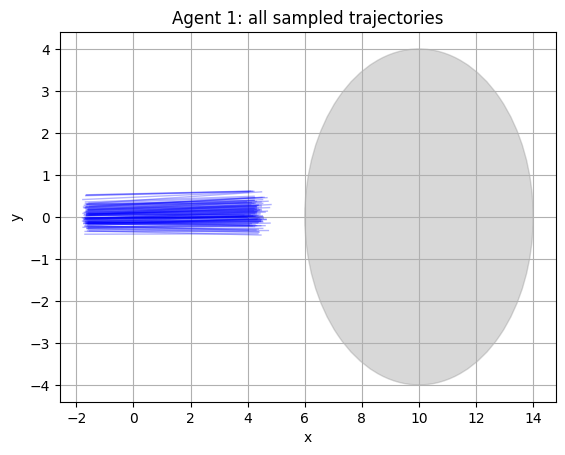

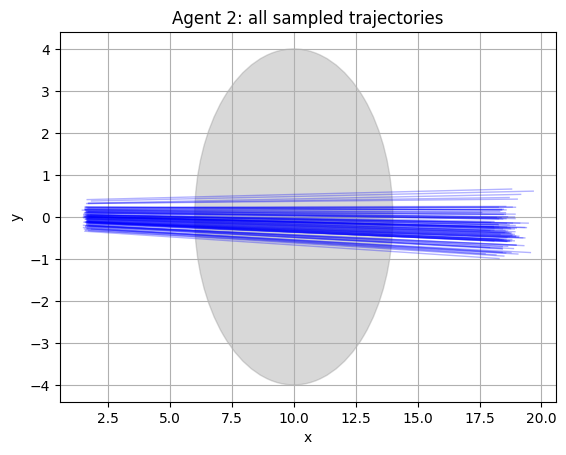

In [ ]:
def load_trajectories(traj_dir, prefix):
    """Load all .npy files matching prefix_<idx>.npy into a list of arrays."""
    pattern = os.path.join(traj_dir, f"{prefix}_*.npy")
    files = sorted(glob.glob(pattern))
    if not files:
        raise FileNotFoundError(f"No files found with pattern {pattern}")
    return [np.load(f) for f in files]

def plot_overlay(trajs, title):
    """Overlay X–Y trajectories in one figure."""
    plt.figure()
    obstacle = (10, 0, 4.0) 
    ox, oy, r = obstacle
    circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
    plt.gca().add_patch(circle1)
    for traj in trajs:
        plt.plot(traj[:,0], traj[:,1], alpha=0.3, linewidth=1, color='blue')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

def plot_pairwise(trajs1, trajs2):
    """For each sample index, plot agent1 and agent2 together."""
    n = min(len(trajs1), len(trajs2))
    for i in range(n):
        plt.figure()
        plt.plot(trajs1[i][:,0], trajs1[i][:,1], label="Agent 1")
        plt.plot(trajs2[i][:,0], trajs2[i][:,1], label="Agent 2")
        plt.title(f"Sample {i:03d}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()

def main():
    traj_dir = "sampled_trajs/bc"  # adjust if needed

    # Load all trajectories
    agent1 = load_trajectories(traj_dir, "traj1")
    agent2 = load_trajectories(traj_dir, "traj2")

    # Overlay all of agent 1’s paths
    plot_overlay(agent1, "Agent 1: all sampled trajectories")

    # Overlay all of agent 2’s paths
    plot_overlay(agent2, "Agent 2: all sampled trajectories")

    # And finally, plot each pair side by side
    # plot_pairwise(agent1, agent2)

if __name__ == "__main__":
    main()
